In [1]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img
import os

trains_dirname = os.path.join('..', 'dataset', 'labeled', 'trains')
valids_dirname = os.path.join('..', 'dataset', 'labeled', 'valids')
trains_generator = ImageDataGenerator(
    rescale=1 / 255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    channel_shift_range=20.0,
    #shear_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
    )
valids_generator = ImageDataGenerator()

trains_generator = trains_generator.flow_from_directory(
    trains_dirname,
    target_size=(32,32),
    batch_size=32,
    class_mode='binary'
)
valids_generator = valids_generator.flow_from_directory(
    valids_dirname,
    target_size=(32,32),
    batch_size=32,
    class_mode='binary'
)

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Found 80 images belonging to 2 classes.
Found 31 images belonging to 2 classes.


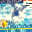

0.0

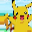

1.0

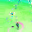

0.0

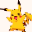

1.0

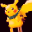

1.0

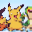

1.0

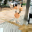

0.0

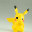

1.0

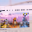

0.0

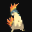

0.0

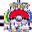

0.0

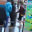

0.0

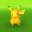

1.0

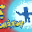

0.0

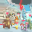

0.0

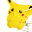

1.0

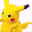

1.0

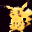

1.0

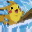

1.0

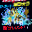

0.0

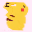

1.0

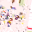

0.0

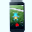

0.0

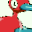

0.0

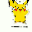

1.0

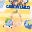

0.0

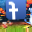

0.0

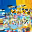

0.0

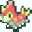

0.0

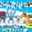

0.0

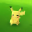

1.0

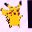

1.0

In [2]:
generated = trains_generator.next()
images = generated[0]
labels = generated[1]
for i, image in enumerate(images):
    display(array_to_img(image))
    display(labels[i])

In [2]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, SeparableConv2D
from keras.layers.convolutional import MaxPooling2D, AveragePooling2D
from keras.layers.core import Dense, Activation, Dropout, Flatten

model = Sequential()

model.add(SeparableConv2D(32, kernel_size=3, padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(SeparableConv2D(32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(SeparableConv2D(16, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(SeparableConv2D(8, kernel_size=5, padding='same', activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc', 'mae'])
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc', 'mae'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_1 (Separabl (None, 32, 32, 32)        155       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
separable_conv2d_2 (Separabl (None, 16, 16, 32)        1344      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
separable_conv2d_3 (Separabl (None, 8, 8, 16)          816       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
separable_conv2d_4 (Separabl (None, 4, 4, 8)           536       
__________

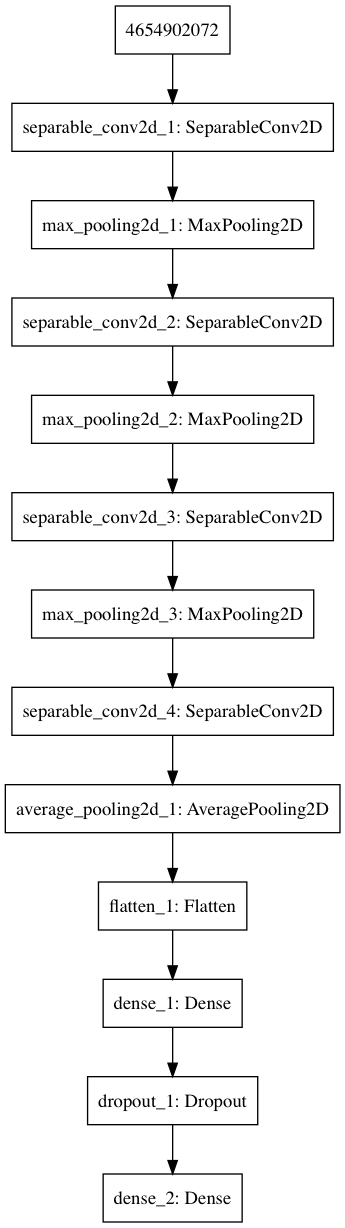

In [16]:
from IPython.display import Image
from keras.utils.vis_utils import model_to_dot

Image(model_to_dot(model).create(prog='dot', format='png'))

In [11]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

model_filename = os.path.join('models', 'finding-pikachu_model_{val_loss:.2f}.h5')

model.fit_generator(
    trains_generator,
    validation_data=valids_generator,
    steps_per_epoch=100,
    epochs=100,
    callbacks = [
        TensorBoard(log_dir='tflogs'),
        EarlyStopping(patience=3, monitor='val_loss'),
        ModelCheckpoint(model_filename, monitor='val_loss', save_best_only=True),
    ]
)

Epoch 1/100
100/100 [==============================] - 9s 90ms/step - loss: 0.6714 - acc: 0.6188 - mean_absolute_error: 0.4796 - val_loss: 5.7193 - val_acc: 0.6452 - val_mean_absolute_error: 0.3548
Epoch 2/100
100/100 [==============================] - 8s 85ms/step - loss: 0.5618 - acc: 0.6719 - mean_absolute_error: 0.4019 - val_loss: 3.6396 - val_acc: 0.7742 - val_mean_absolute_error: 0.2258
Epoch 3/100
100/100 [==============================] - 8s 80ms/step - loss: 0.2066 - acc: 0.9212 - mean_absolute_error: 0.1321 - val_loss: 0.5143 - val_acc: 0.9677 - val_mean_absolute_error: 0.0323
Epoch 4/100
100/100 [==============================] - 9s 95ms/step - loss: 0.1596 - acc: 0.9450 - mean_absolute_error: 0.0942 - val_loss: 1.0682e-07 - val_acc: 1.0000 - val_mean_absolute_error: 0.0000e+00
Epoch 5/100
100/100 [==============================] - 9s 93ms/step - loss: 0.1245 - acc: 0.9584 - mean_absolute_error: 0.0712 - val_loss: 1.0682e-07 - val_acc: 1.0000 - val_mean_absolute_error: 0.000

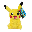

array([[0.983148]], dtype=float32)

In [12]:
from keras.preprocessing.image import load_img, img_to_array
import numpy as np

predicting_filename = os.path.join('..', 'dataset', 'reshaped', '2568.jpg')
predicting_image = load_img(predicting_filename).resize((32, 32))
predicting_array = img_to_array(predicting_image) / 255
display(predicting_image)
predicted = model.predict(np.array([
    predicting_array
]))
display(predicted)

In [13]:
import glob
import os
from keras.preprocessing.image import load_img, img_to_array
import shutil

predicting_dirname = os.path.join('..', 'dataset', 'reshaped', '*')
predicted_dirname = os.path.join('..', 'dataset', 'predicted_auto2')
for i, file in enumerate(glob.glob(predicting_dirname)):
    image =load_img(file).resize((32, 32))
    array = img_to_array(image) / 255
    predicted = model.predict(np.array([
        array
    ]))
    prob = int(predicted[0][0]*100)
    print(f'file={file}, pikachu?={prob}%')
    
    if prob >= 99:
        shutil.copy(file, predicted_dirname)

file=..\dataset\reshaped\1.jpg, pikachu?=0%
file=..\dataset\reshaped\10.jpg, pikachu?=0%
file=..\dataset\reshaped\100.jpg, pikachu?=0%
file=..\dataset\reshaped\1000.jpg, pikachu?=97%
file=..\dataset\reshaped\1001.jpg, pikachu?=1%
file=..\dataset\reshaped\1002.jpg, pikachu?=71%
file=..\dataset\reshaped\1003.jpg, pikachu?=98%
file=..\dataset\reshaped\1004.jpg, pikachu?=0%
file=..\dataset\reshaped\1005.jpg, pikachu?=99%
file=..\dataset\reshaped\1006.jpg, pikachu?=98%
file=..\dataset\reshaped\1007.jpg, pikachu?=90%
file=..\dataset\reshaped\1008.jpg, pikachu?=1%
file=..\dataset\reshaped\1009.jpg, pikachu?=2%
file=..\dataset\reshaped\101.jpg, pikachu?=0%
file=..\dataset\reshaped\1010.jpg, pikachu?=96%
file=..\dataset\reshaped\1011.jpg, pikachu?=0%
file=..\dataset\reshaped\1012.jpg, pikachu?=99%
file=..\dataset\reshaped\1013.jpg, pikachu?=31%
file=..\dataset\reshaped\1014.jpg, pikachu?=83%
file=..\dataset\reshaped\1015.jpg, pikachu?=0%
file=..\dataset\reshaped\1016.jpg, pikachu?=99%
file=..\d

file=..\dataset\reshaped\116.jpg, pikachu?=16%
file=..\dataset\reshaped\1160.jpg, pikachu?=53%
file=..\dataset\reshaped\1161.jpg, pikachu?=0%
file=..\dataset\reshaped\1162.jpg, pikachu?=97%
file=..\dataset\reshaped\1163.jpg, pikachu?=99%
file=..\dataset\reshaped\1164.jpg, pikachu?=99%
file=..\dataset\reshaped\1165.jpg, pikachu?=0%
file=..\dataset\reshaped\1166.jpg, pikachu?=17%
file=..\dataset\reshaped\1167.jpg, pikachu?=98%
file=..\dataset\reshaped\1168.jpg, pikachu?=1%
file=..\dataset\reshaped\1169.jpg, pikachu?=99%
file=..\dataset\reshaped\117.jpg, pikachu?=0%
file=..\dataset\reshaped\1170.jpg, pikachu?=97%
file=..\dataset\reshaped\1171.jpg, pikachu?=5%
file=..\dataset\reshaped\1172.jpg, pikachu?=13%
file=..\dataset\reshaped\1173.jpg, pikachu?=10%
file=..\dataset\reshaped\1174.jpg, pikachu?=0%
file=..\dataset\reshaped\1175.jpg, pikachu?=71%
file=..\dataset\reshaped\1176.jpg, pikachu?=99%
file=..\dataset\reshaped\1177.jpg, pikachu?=99%
file=..\dataset\reshaped\1178.jpg, pikachu?=96%


file=..\dataset\reshaped\1321.jpg, pikachu?=17%
file=..\dataset\reshaped\1322.jpg, pikachu?=99%
file=..\dataset\reshaped\1323.jpg, pikachu?=6%
file=..\dataset\reshaped\1324.jpg, pikachu?=1%
file=..\dataset\reshaped\1325.jpg, pikachu?=98%
file=..\dataset\reshaped\1326.jpg, pikachu?=99%
file=..\dataset\reshaped\1327.jpg, pikachu?=99%
file=..\dataset\reshaped\1328.jpg, pikachu?=13%
file=..\dataset\reshaped\1329.jpg, pikachu?=99%
file=..\dataset\reshaped\133.jpg, pikachu?=0%
file=..\dataset\reshaped\1330.jpg, pikachu?=99%
file=..\dataset\reshaped\1331.jpg, pikachu?=97%
file=..\dataset\reshaped\1332.jpg, pikachu?=99%
file=..\dataset\reshaped\1333.jpg, pikachu?=91%
file=..\dataset\reshaped\1334.jpg, pikachu?=99%
file=..\dataset\reshaped\1335.jpg, pikachu?=99%
file=..\dataset\reshaped\1336.jpg, pikachu?=90%
file=..\dataset\reshaped\1337.jpg, pikachu?=85%
file=..\dataset\reshaped\1338.jpg, pikachu?=42%
file=..\dataset\reshaped\1339.jpg, pikachu?=98%
file=..\dataset\reshaped\134.jpg, pikachu?=2

file=..\dataset\reshaped\148.jpg, pikachu?=0%
file=..\dataset\reshaped\1480.jpg, pikachu?=88%
file=..\dataset\reshaped\1481.jpg, pikachu?=84%
file=..\dataset\reshaped\1482.jpg, pikachu?=40%
file=..\dataset\reshaped\1483.jpg, pikachu?=94%
file=..\dataset\reshaped\1484.jpg, pikachu?=0%
file=..\dataset\reshaped\1485.jpg, pikachu?=2%
file=..\dataset\reshaped\1486.jpg, pikachu?=99%
file=..\dataset\reshaped\1487.jpg, pikachu?=3%
file=..\dataset\reshaped\1488.jpg, pikachu?=99%
file=..\dataset\reshaped\1489.jpg, pikachu?=98%
file=..\dataset\reshaped\149.jpg, pikachu?=0%
file=..\dataset\reshaped\1490.jpg, pikachu?=97%
file=..\dataset\reshaped\1491.jpg, pikachu?=99%
file=..\dataset\reshaped\1492.jpg, pikachu?=4%
file=..\dataset\reshaped\1493.jpg, pikachu?=99%
file=..\dataset\reshaped\1494.jpg, pikachu?=99%
file=..\dataset\reshaped\1495.jpg, pikachu?=98%
file=..\dataset\reshaped\1496.jpg, pikachu?=98%
file=..\dataset\reshaped\1497.jpg, pikachu?=99%
file=..\dataset\reshaped\1498.jpg, pikachu?=99%


file=..\dataset\reshaped\1644.jpg, pikachu?=16%
file=..\dataset\reshaped\1645.jpg, pikachu?=98%
file=..\dataset\reshaped\1646.jpg, pikachu?=99%
file=..\dataset\reshaped\1647.jpg, pikachu?=0%
file=..\dataset\reshaped\1648.jpg, pikachu?=35%
file=..\dataset\reshaped\1649.jpg, pikachu?=86%
file=..\dataset\reshaped\165.jpg, pikachu?=0%
file=..\dataset\reshaped\1650.jpg, pikachu?=95%
file=..\dataset\reshaped\1651.jpg, pikachu?=94%
file=..\dataset\reshaped\1652.jpg, pikachu?=68%
file=..\dataset\reshaped\1653.jpg, pikachu?=2%
file=..\dataset\reshaped\1654.jpg, pikachu?=99%
file=..\dataset\reshaped\1655.jpg, pikachu?=95%
file=..\dataset\reshaped\1656.jpg, pikachu?=0%
file=..\dataset\reshaped\1657.jpg, pikachu?=99%
file=..\dataset\reshaped\1658.jpg, pikachu?=96%
file=..\dataset\reshaped\1659.jpg, pikachu?=99%
file=..\dataset\reshaped\166.jpg, pikachu?=0%
file=..\dataset\reshaped\1660.jpg, pikachu?=0%
file=..\dataset\reshaped\1661.jpg, pikachu?=0%
file=..\dataset\reshaped\1662.jpg, pikachu?=99%
f

file=..\dataset\reshaped\1813.jpg, pikachu?=98%
file=..\dataset\reshaped\1814.jpg, pikachu?=1%
file=..\dataset\reshaped\1815.jpg, pikachu?=10%
file=..\dataset\reshaped\1816.jpg, pikachu?=7%
file=..\dataset\reshaped\1817.jpg, pikachu?=0%
file=..\dataset\reshaped\1818.jpg, pikachu?=22%
file=..\dataset\reshaped\1819.jpg, pikachu?=1%
file=..\dataset\reshaped\182.jpg, pikachu?=0%
file=..\dataset\reshaped\1820.jpg, pikachu?=56%
file=..\dataset\reshaped\1821.jpg, pikachu?=85%
file=..\dataset\reshaped\1822.jpg, pikachu?=99%
file=..\dataset\reshaped\1823.jpg, pikachu?=99%
file=..\dataset\reshaped\1824.jpg, pikachu?=99%
file=..\dataset\reshaped\1825.jpg, pikachu?=99%
file=..\dataset\reshaped\1826.jpg, pikachu?=39%
file=..\dataset\reshaped\1827.jpg, pikachu?=0%
file=..\dataset\reshaped\1828.jpg, pikachu?=95%
file=..\dataset\reshaped\1829.jpg, pikachu?=21%
file=..\dataset\reshaped\183.jpg, pikachu?=90%
file=..\dataset\reshaped\1830.jpg, pikachu?=0%
file=..\dataset\reshaped\1831.jpg, pikachu?=99%
f

file=..\dataset\reshaped\1987.jpg, pikachu?=99%
file=..\dataset\reshaped\1988.jpg, pikachu?=93%
file=..\dataset\reshaped\1989.jpg, pikachu?=5%
file=..\dataset\reshaped\199.jpg, pikachu?=98%
file=..\dataset\reshaped\1990.jpg, pikachu?=95%
file=..\dataset\reshaped\1991.jpg, pikachu?=99%
file=..\dataset\reshaped\1992.jpg, pikachu?=98%
file=..\dataset\reshaped\1993.jpg, pikachu?=99%
file=..\dataset\reshaped\1994.jpg, pikachu?=0%
file=..\dataset\reshaped\1995.jpg, pikachu?=89%
file=..\dataset\reshaped\1996.jpg, pikachu?=42%
file=..\dataset\reshaped\1997.jpg, pikachu?=0%
file=..\dataset\reshaped\1998.jpg, pikachu?=1%
file=..\dataset\reshaped\1999.jpg, pikachu?=90%
file=..\dataset\reshaped\2.jpg, pikachu?=0%
file=..\dataset\reshaped\20.jpg, pikachu?=0%
file=..\dataset\reshaped\200.jpg, pikachu?=0%
file=..\dataset\reshaped\2000.jpg, pikachu?=98%
file=..\dataset\reshaped\2001.jpg, pikachu?=96%
file=..\dataset\reshaped\2002.jpg, pikachu?=48%
file=..\dataset\reshaped\2003.jpg, pikachu?=3%
file=..

file=..\dataset\reshaped\2157.jpg, pikachu?=37%
file=..\dataset\reshaped\2158.jpg, pikachu?=0%
file=..\dataset\reshaped\2159.jpg, pikachu?=8%
file=..\dataset\reshaped\216.jpg, pikachu?=0%
file=..\dataset\reshaped\2160.jpg, pikachu?=99%
file=..\dataset\reshaped\2161.jpg, pikachu?=0%
file=..\dataset\reshaped\2162.jpg, pikachu?=80%
file=..\dataset\reshaped\2163.jpg, pikachu?=99%
file=..\dataset\reshaped\2164.jpg, pikachu?=88%
file=..\dataset\reshaped\2165.jpg, pikachu?=99%
file=..\dataset\reshaped\2166.jpg, pikachu?=0%
file=..\dataset\reshaped\2167.jpg, pikachu?=97%
file=..\dataset\reshaped\2168.jpg, pikachu?=5%
file=..\dataset\reshaped\2169.jpg, pikachu?=83%
file=..\dataset\reshaped\217.jpg, pikachu?=0%
file=..\dataset\reshaped\2170.jpg, pikachu?=0%
file=..\dataset\reshaped\2171.jpg, pikachu?=99%
file=..\dataset\reshaped\2172.jpg, pikachu?=53%
file=..\dataset\reshaped\2173.jpg, pikachu?=1%
file=..\dataset\reshaped\2174.jpg, pikachu?=99%
file=..\dataset\reshaped\2175.jpg, pikachu?=93%
fil

file=..\dataset\reshaped\2328.jpg, pikachu?=0%
file=..\dataset\reshaped\2329.jpg, pikachu?=99%
file=..\dataset\reshaped\233.jpg, pikachu?=93%
file=..\dataset\reshaped\2330.jpg, pikachu?=99%
file=..\dataset\reshaped\2331.jpg, pikachu?=0%
file=..\dataset\reshaped\2332.jpg, pikachu?=0%
file=..\dataset\reshaped\2333.jpg, pikachu?=95%
file=..\dataset\reshaped\2334.jpg, pikachu?=98%
file=..\dataset\reshaped\2335.jpg, pikachu?=99%
file=..\dataset\reshaped\2336.jpg, pikachu?=93%
file=..\dataset\reshaped\2337.jpg, pikachu?=97%
file=..\dataset\reshaped\2338.jpg, pikachu?=81%
file=..\dataset\reshaped\2339.jpg, pikachu?=99%
file=..\dataset\reshaped\234.jpg, pikachu?=0%
file=..\dataset\reshaped\2340.jpg, pikachu?=99%
file=..\dataset\reshaped\2341.jpg, pikachu?=3%
file=..\dataset\reshaped\2342.jpg, pikachu?=0%
file=..\dataset\reshaped\2343.jpg, pikachu?=0%
file=..\dataset\reshaped\2344.jpg, pikachu?=0%
file=..\dataset\reshaped\2345.jpg, pikachu?=98%
file=..\dataset\reshaped\2346.jpg, pikachu?=0%
fil

file=..\dataset\reshaped\2497.jpg, pikachu?=99%
file=..\dataset\reshaped\2498.jpg, pikachu?=34%
file=..\dataset\reshaped\2499.jpg, pikachu?=0%
file=..\dataset\reshaped\25.jpg, pikachu?=0%
file=..\dataset\reshaped\250.jpg, pikachu?=98%
file=..\dataset\reshaped\2500.jpg, pikachu?=28%
file=..\dataset\reshaped\2501.jpg, pikachu?=0%
file=..\dataset\reshaped\2502.jpg, pikachu?=99%
file=..\dataset\reshaped\2503.jpg, pikachu?=0%
file=..\dataset\reshaped\2504.jpg, pikachu?=17%
file=..\dataset\reshaped\2505.jpg, pikachu?=0%
file=..\dataset\reshaped\2506.jpg, pikachu?=16%
file=..\dataset\reshaped\2507.jpg, pikachu?=99%
file=..\dataset\reshaped\2508.jpg, pikachu?=99%
file=..\dataset\reshaped\2509.jpg, pikachu?=99%
file=..\dataset\reshaped\251.jpg, pikachu?=0%
file=..\dataset\reshaped\2510.jpg, pikachu?=1%
file=..\dataset\reshaped\2511.jpg, pikachu?=0%
file=..\dataset\reshaped\2512.jpg, pikachu?=2%
file=..\dataset\reshaped\2513.jpg, pikachu?=99%
file=..\dataset\reshaped\2514.jpg, pikachu?=99%
file=

file=..\dataset\reshaped\2673.jpg, pikachu?=90%
file=..\dataset\reshaped\2674.jpg, pikachu?=99%
file=..\dataset\reshaped\2675.jpg, pikachu?=99%
file=..\dataset\reshaped\2676.jpg, pikachu?=99%
file=..\dataset\reshaped\2677.jpg, pikachu?=0%
file=..\dataset\reshaped\2678.jpg, pikachu?=6%
file=..\dataset\reshaped\2679.jpg, pikachu?=2%
file=..\dataset\reshaped\268.jpg, pikachu?=0%
file=..\dataset\reshaped\2680.jpg, pikachu?=97%
file=..\dataset\reshaped\2681.jpg, pikachu?=99%
file=..\dataset\reshaped\2682.jpg, pikachu?=95%
file=..\dataset\reshaped\2683.jpg, pikachu?=98%
file=..\dataset\reshaped\2684.jpg, pikachu?=0%
file=..\dataset\reshaped\2685.jpg, pikachu?=34%
file=..\dataset\reshaped\2686.jpg, pikachu?=0%
file=..\dataset\reshaped\2687.jpg, pikachu?=34%
file=..\dataset\reshaped\2688.jpg, pikachu?=66%
file=..\dataset\reshaped\2689.jpg, pikachu?=13%
file=..\dataset\reshaped\269.jpg, pikachu?=99%
file=..\dataset\reshaped\2690.jpg, pikachu?=94%
file=..\dataset\reshaped\2691.jpg, pikachu?=0%
f

file=..\dataset\reshaped\2850.jpg, pikachu?=99%
file=..\dataset\reshaped\2851.jpg, pikachu?=0%
file=..\dataset\reshaped\2852.jpg, pikachu?=98%
file=..\dataset\reshaped\2853.jpg, pikachu?=98%
file=..\dataset\reshaped\2854.jpg, pikachu?=32%
file=..\dataset\reshaped\2855.jpg, pikachu?=99%
file=..\dataset\reshaped\2856.jpg, pikachu?=0%
file=..\dataset\reshaped\2857.jpg, pikachu?=0%
file=..\dataset\reshaped\2858.jpg, pikachu?=68%
file=..\dataset\reshaped\2859.jpg, pikachu?=98%
file=..\dataset\reshaped\286.jpg, pikachu?=0%
file=..\dataset\reshaped\2860.jpg, pikachu?=98%
file=..\dataset\reshaped\2861.jpg, pikachu?=0%
file=..\dataset\reshaped\2862.jpg, pikachu?=99%
file=..\dataset\reshaped\2863.jpg, pikachu?=99%
file=..\dataset\reshaped\2864.jpg, pikachu?=0%
file=..\dataset\reshaped\2865.jpg, pikachu?=18%
file=..\dataset\reshaped\2866.jpg, pikachu?=99%
file=..\dataset\reshaped\2867.jpg, pikachu?=0%
file=..\dataset\reshaped\2868.jpg, pikachu?=97%
file=..\dataset\reshaped\2869.jpg, pikachu?=6%
f

file=..\dataset\reshaped\3016.jpg, pikachu?=99%
file=..\dataset\reshaped\3017.jpg, pikachu?=0%
file=..\dataset\reshaped\3018.jpg, pikachu?=2%
file=..\dataset\reshaped\3019.jpg, pikachu?=1%
file=..\dataset\reshaped\302.jpg, pikachu?=0%
file=..\dataset\reshaped\3020.jpg, pikachu?=98%
file=..\dataset\reshaped\3021.jpg, pikachu?=99%
file=..\dataset\reshaped\3022.jpg, pikachu?=0%
file=..\dataset\reshaped\3023.jpg, pikachu?=99%
file=..\dataset\reshaped\3024.jpg, pikachu?=96%
file=..\dataset\reshaped\3025.jpg, pikachu?=98%
file=..\dataset\reshaped\3026.jpg, pikachu?=2%
file=..\dataset\reshaped\3027.jpg, pikachu?=0%
file=..\dataset\reshaped\3028.jpg, pikachu?=99%
file=..\dataset\reshaped\3029.jpg, pikachu?=99%
file=..\dataset\reshaped\303.jpg, pikachu?=0%
file=..\dataset\reshaped\3030.jpg, pikachu?=3%
file=..\dataset\reshaped\3031.jpg, pikachu?=96%
file=..\dataset\reshaped\3032.jpg, pikachu?=95%
file=..\dataset\reshaped\3033.jpg, pikachu?=99%
file=..\dataset\reshaped\3034.jpg, pikachu?=2%
file

file=..\dataset\reshaped\3188.jpg, pikachu?=0%
file=..\dataset\reshaped\3189.jpg, pikachu?=98%
file=..\dataset\reshaped\319.jpg, pikachu?=0%
file=..\dataset\reshaped\3190.jpg, pikachu?=0%
file=..\dataset\reshaped\3191.jpg, pikachu?=82%
file=..\dataset\reshaped\3192.jpg, pikachu?=0%
file=..\dataset\reshaped\3193.jpg, pikachu?=0%
file=..\dataset\reshaped\3194.jpg, pikachu?=94%
file=..\dataset\reshaped\3195.jpg, pikachu?=98%
file=..\dataset\reshaped\3196.jpg, pikachu?=98%
file=..\dataset\reshaped\3197.jpg, pikachu?=0%
file=..\dataset\reshaped\3198.jpg, pikachu?=98%
file=..\dataset\reshaped\3199.jpg, pikachu?=99%
file=..\dataset\reshaped\32.jpg, pikachu?=0%
file=..\dataset\reshaped\320.jpg, pikachu?=0%
file=..\dataset\reshaped\3200.jpg, pikachu?=22%
file=..\dataset\reshaped\3201.jpg, pikachu?=34%
file=..\dataset\reshaped\3202.jpg, pikachu?=81%
file=..\dataset\reshaped\3203.jpg, pikachu?=99%
file=..\dataset\reshaped\3204.jpg, pikachu?=4%
file=..\dataset\reshaped\3205.jpg, pikachu?=99%
file=

file=..\dataset\reshaped\3352.jpg, pikachu?=99%
file=..\dataset\reshaped\3353.jpg, pikachu?=0%
file=..\dataset\reshaped\3354.jpg, pikachu?=99%
file=..\dataset\reshaped\3355.jpg, pikachu?=0%
file=..\dataset\reshaped\3356.jpg, pikachu?=67%
file=..\dataset\reshaped\3357.jpg, pikachu?=0%
file=..\dataset\reshaped\3358.jpg, pikachu?=99%
file=..\dataset\reshaped\3359.jpg, pikachu?=99%
file=..\dataset\reshaped\336.jpg, pikachu?=0%
file=..\dataset\reshaped\3360.jpg, pikachu?=99%
file=..\dataset\reshaped\3361.jpg, pikachu?=23%
file=..\dataset\reshaped\3362.jpg, pikachu?=99%
file=..\dataset\reshaped\3363.jpg, pikachu?=0%
file=..\dataset\reshaped\3364.jpg, pikachu?=97%
file=..\dataset\reshaped\3365.jpg, pikachu?=31%
file=..\dataset\reshaped\3366.jpg, pikachu?=78%
file=..\dataset\reshaped\3367.jpg, pikachu?=4%
file=..\dataset\reshaped\3368.jpg, pikachu?=0%
file=..\dataset\reshaped\3369.jpg, pikachu?=98%
file=..\dataset\reshaped\337.jpg, pikachu?=5%
file=..\dataset\reshaped\3370.jpg, pikachu?=5%
fil

file=..\dataset\reshaped\3541.jpg, pikachu?=0%
file=..\dataset\reshaped\3542.jpg, pikachu?=0%
file=..\dataset\reshaped\3543.jpg, pikachu?=0%
file=..\dataset\reshaped\3544.jpg, pikachu?=0%
file=..\dataset\reshaped\3545.jpg, pikachu?=99%
file=..\dataset\reshaped\3546.jpg, pikachu?=0%
file=..\dataset\reshaped\3547.jpg, pikachu?=0%
file=..\dataset\reshaped\3548.jpg, pikachu?=0%
file=..\dataset\reshaped\3549.jpg, pikachu?=0%
file=..\dataset\reshaped\355.jpg, pikachu?=0%
file=..\dataset\reshaped\3550.jpg, pikachu?=0%
file=..\dataset\reshaped\3551.jpg, pikachu?=0%
file=..\dataset\reshaped\3552.jpg, pikachu?=0%
file=..\dataset\reshaped\3553.jpg, pikachu?=0%
file=..\dataset\reshaped\3554.jpg, pikachu?=0%
file=..\dataset\reshaped\3555.jpg, pikachu?=98%
file=..\dataset\reshaped\3556.jpg, pikachu?=0%
file=..\dataset\reshaped\3557.jpg, pikachu?=0%
file=..\dataset\reshaped\3558.jpg, pikachu?=0%
file=..\dataset\reshaped\3559.jpg, pikachu?=0%
file=..\dataset\reshaped\356.jpg, pikachu?=0%
file=..\datas

file=..\dataset\reshaped\37.jpg, pikachu?=0%
file=..\dataset\reshaped\370.jpg, pikachu?=0%
file=..\dataset\reshaped\3700.jpg, pikachu?=0%
file=..\dataset\reshaped\3701.jpg, pikachu?=0%
file=..\dataset\reshaped\3702.jpg, pikachu?=0%
file=..\dataset\reshaped\3703.jpg, pikachu?=0%
file=..\dataset\reshaped\3704.jpg, pikachu?=0%
file=..\dataset\reshaped\3705.jpg, pikachu?=0%
file=..\dataset\reshaped\3706.jpg, pikachu?=0%
file=..\dataset\reshaped\3707.jpg, pikachu?=0%
file=..\dataset\reshaped\3708.jpg, pikachu?=0%
file=..\dataset\reshaped\3709.jpg, pikachu?=2%
file=..\dataset\reshaped\371.jpg, pikachu?=0%
file=..\dataset\reshaped\3710.jpg, pikachu?=0%
file=..\dataset\reshaped\3711.jpg, pikachu?=0%
file=..\dataset\reshaped\3712.jpg, pikachu?=0%
file=..\dataset\reshaped\3713.jpg, pikachu?=0%
file=..\dataset\reshaped\3714.jpg, pikachu?=0%
file=..\dataset\reshaped\3715.jpg, pikachu?=2%
file=..\dataset\reshaped\3716.jpg, pikachu?=0%
file=..\dataset\reshaped\3717.jpg, pikachu?=0%
file=..\dataset\r

file=..\dataset\reshaped\3883.jpg, pikachu?=0%
file=..\dataset\reshaped\3884.jpg, pikachu?=0%
file=..\dataset\reshaped\3885.jpg, pikachu?=0%
file=..\dataset\reshaped\3886.jpg, pikachu?=0%
file=..\dataset\reshaped\3887.jpg, pikachu?=0%
file=..\dataset\reshaped\3888.jpg, pikachu?=0%
file=..\dataset\reshaped\3889.jpg, pikachu?=0%
file=..\dataset\reshaped\389.jpg, pikachu?=0%
file=..\dataset\reshaped\3890.jpg, pikachu?=0%
file=..\dataset\reshaped\3891.jpg, pikachu?=0%
file=..\dataset\reshaped\3892.jpg, pikachu?=0%
file=..\dataset\reshaped\3893.jpg, pikachu?=0%
file=..\dataset\reshaped\3894.jpg, pikachu?=0%
file=..\dataset\reshaped\3895.jpg, pikachu?=0%
file=..\dataset\reshaped\3896.jpg, pikachu?=0%
file=..\dataset\reshaped\3897.jpg, pikachu?=0%
file=..\dataset\reshaped\3898.jpg, pikachu?=0%
file=..\dataset\reshaped\3899.jpg, pikachu?=0%
file=..\dataset\reshaped\39.jpg, pikachu?=99%
file=..\dataset\reshaped\390.jpg, pikachu?=34%
file=..\dataset\reshaped\3900.jpg, pikachu?=0%
file=..\dataset

file=..\dataset\reshaped\4045.jpg, pikachu?=0%
file=..\dataset\reshaped\4046.jpg, pikachu?=0%
file=..\dataset\reshaped\4047.jpg, pikachu?=97%
file=..\dataset\reshaped\4048.jpg, pikachu?=98%
file=..\dataset\reshaped\4049.jpg, pikachu?=0%
file=..\dataset\reshaped\405.jpg, pikachu?=0%
file=..\dataset\reshaped\4050.jpg, pikachu?=0%
file=..\dataset\reshaped\4051.jpg, pikachu?=0%
file=..\dataset\reshaped\4052.jpg, pikachu?=0%
file=..\dataset\reshaped\4053.jpg, pikachu?=0%
file=..\dataset\reshaped\4054.jpg, pikachu?=0%
file=..\dataset\reshaped\4055.jpg, pikachu?=0%
file=..\dataset\reshaped\4056.jpg, pikachu?=0%
file=..\dataset\reshaped\4057.jpg, pikachu?=18%
file=..\dataset\reshaped\4058.jpg, pikachu?=0%
file=..\dataset\reshaped\4059.jpg, pikachu?=0%
file=..\dataset\reshaped\406.jpg, pikachu?=0%
file=..\dataset\reshaped\4060.jpg, pikachu?=0%
file=..\dataset\reshaped\4061.jpg, pikachu?=34%
file=..\dataset\reshaped\4062.jpg, pikachu?=0%
file=..\dataset\reshaped\4063.jpg, pikachu?=98%
file=..\da

file=..\dataset\reshaped\436.jpg, pikachu?=99%
file=..\dataset\reshaped\437.jpg, pikachu?=0%
file=..\dataset\reshaped\438.jpg, pikachu?=0%
file=..\dataset\reshaped\439.jpg, pikachu?=2%
file=..\dataset\reshaped\44.jpg, pikachu?=0%
file=..\dataset\reshaped\440.jpg, pikachu?=98%
file=..\dataset\reshaped\441.jpg, pikachu?=40%
file=..\dataset\reshaped\442.jpg, pikachu?=0%
file=..\dataset\reshaped\443.jpg, pikachu?=0%
file=..\dataset\reshaped\444.jpg, pikachu?=0%
file=..\dataset\reshaped\445.jpg, pikachu?=1%
file=..\dataset\reshaped\446.jpg, pikachu?=0%
file=..\dataset\reshaped\447.jpg, pikachu?=0%
file=..\dataset\reshaped\448.jpg, pikachu?=39%
file=..\dataset\reshaped\449.jpg, pikachu?=0%
file=..\dataset\reshaped\45.jpg, pikachu?=0%
file=..\dataset\reshaped\450.jpg, pikachu?=0%
file=..\dataset\reshaped\451.jpg, pikachu?=0%
file=..\dataset\reshaped\452.jpg, pikachu?=97%
file=..\dataset\reshaped\453.jpg, pikachu?=0%
file=..\dataset\reshaped\454.jpg, pikachu?=3%
file=..\dataset\reshaped\455.jp

file=..\dataset\reshaped\634.jpg, pikachu?=0%
file=..\dataset\reshaped\635.jpg, pikachu?=0%
file=..\dataset\reshaped\636.jpg, pikachu?=0%
file=..\dataset\reshaped\637.jpg, pikachu?=0%
file=..\dataset\reshaped\638.jpg, pikachu?=49%
file=..\dataset\reshaped\639.jpg, pikachu?=0%
file=..\dataset\reshaped\64.jpg, pikachu?=0%
file=..\dataset\reshaped\640.jpg, pikachu?=0%
file=..\dataset\reshaped\641.jpg, pikachu?=0%
file=..\dataset\reshaped\642.jpg, pikachu?=0%
file=..\dataset\reshaped\643.jpg, pikachu?=1%
file=..\dataset\reshaped\644.jpg, pikachu?=0%
file=..\dataset\reshaped\645.jpg, pikachu?=0%
file=..\dataset\reshaped\646.jpg, pikachu?=0%
file=..\dataset\reshaped\647.jpg, pikachu?=38%
file=..\dataset\reshaped\648.jpg, pikachu?=0%
file=..\dataset\reshaped\649.jpg, pikachu?=0%
file=..\dataset\reshaped\65.jpg, pikachu?=0%
file=..\dataset\reshaped\650.jpg, pikachu?=0%
file=..\dataset\reshaped\651.jpg, pikachu?=98%
file=..\dataset\reshaped\652.jpg, pikachu?=0%
file=..\dataset\reshaped\653.jpg,

file=..\dataset\reshaped\823.jpg, pikachu?=98%
file=..\dataset\reshaped\824.jpg, pikachu?=70%
file=..\dataset\reshaped\825.jpg, pikachu?=99%
file=..\dataset\reshaped\826.jpg, pikachu?=24%
file=..\dataset\reshaped\827.jpg, pikachu?=1%
file=..\dataset\reshaped\828.jpg, pikachu?=99%
file=..\dataset\reshaped\829.jpg, pikachu?=91%
file=..\dataset\reshaped\83.jpg, pikachu?=0%
file=..\dataset\reshaped\830.jpg, pikachu?=66%
file=..\dataset\reshaped\831.jpg, pikachu?=98%
file=..\dataset\reshaped\832.jpg, pikachu?=89%
file=..\dataset\reshaped\833.jpg, pikachu?=1%
file=..\dataset\reshaped\834.jpg, pikachu?=99%
file=..\dataset\reshaped\835.jpg, pikachu?=99%
file=..\dataset\reshaped\836.jpg, pikachu?=0%
file=..\dataset\reshaped\837.jpg, pikachu?=87%
file=..\dataset\reshaped\838.jpg, pikachu?=1%
file=..\dataset\reshaped\839.jpg, pikachu?=98%
file=..\dataset\reshaped\84.jpg, pikachu?=0%
file=..\dataset\reshaped\840.jpg, pikachu?=98%
file=..\dataset\reshaped\841.jpg, pikachu?=0%
file=..\dataset\reshap

file=..\dataset\reshaped\983.jpg, pikachu?=0%
file=..\dataset\reshaped\984.jpg, pikachu?=0%
file=..\dataset\reshaped\985.jpg, pikachu?=92%
file=..\dataset\reshaped\986.jpg, pikachu?=90%
file=..\dataset\reshaped\987.jpg, pikachu?=0%
file=..\dataset\reshaped\988.jpg, pikachu?=98%
file=..\dataset\reshaped\989.jpg, pikachu?=2%
file=..\dataset\reshaped\99.jpg, pikachu?=0%
file=..\dataset\reshaped\990.jpg, pikachu?=3%
file=..\dataset\reshaped\991.jpg, pikachu?=53%
file=..\dataset\reshaped\992.jpg, pikachu?=99%
file=..\dataset\reshaped\993.jpg, pikachu?=99%
file=..\dataset\reshaped\994.jpg, pikachu?=97%
file=..\dataset\reshaped\995.jpg, pikachu?=40%
file=..\dataset\reshaped\996.jpg, pikachu?=99%
file=..\dataset\reshaped\997.jpg, pikachu?=99%
file=..\dataset\reshaped\998.jpg, pikachu?=99%
file=..\dataset\reshaped\999.jpg, pikachu?=86%
